In [ ]:
import pandas as pd  # this allows us to work with tables and CSVs
df = pd.read_csv("synthetic_social_media_data.csv")  # this loads the file you just uploaded
df.head()  # this shows the first 5 rows of the file


,Post ID,Post Content,Sentiment Label,Number of Likes,Number of Shares,Number of Comments,User Follower Count,Post Date and Time,Post Type,Language
0,aa391375-7355-44b7-bcbf-97fb4e5a2ba3,Word who nor center everything better politica...,Neutral,157,243,64,4921,10-01-2024 00:14,video,fr
1,1c9ec98d-437a-48d9-9cba-bd5ad853c59a,Begin administration population good president...,Positive,166,49,121,612,03-02-2024 00:20,image,es
2,170e5b5b-1d9a-4d02-a957-93c4dbb18908,Thousand total sign. Agree product relationshi...,Positive,185,224,179,9441,25-07-2024 14:20,video,de
3,aec53496-60ee-4a06-8821-093a04dc8770,Individual from news third. Oil forget them di...,Neutral,851,369,39,6251,20-02-2024 09:15,text,de
4,4eacddb7-990d-4056-8784-7e1d5c4d1404,Time adult letter see reduce. Attention sudden...,Negative,709,356,52,1285,01-03-2024 04:17,image,de


In [ ]:
import re  # This helps us work with text and patterns

# This function will clean the text
def clean_text(text):
    text = text.lower()  # make all letters lowercase
    text = re.sub(r"http\S+", "", text)  # remove links
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove punctuation and numbers
    text = re.sub(r"\s+", " ", text).strip()  # remove extra spaces
    return text

# Apply the cleaning function to the Post Content column
df['Cleaned_Text'] = df['Post Content'].apply(clean_text)

# Show the new column
df[['Post Content', 'Cleaned_Text']].head()


,Post Content,Cleaned_Text
0,Word who nor center everything better politica...,word who nor center everything better politica...
1,Begin administration population good president...,begin administration population good president...
2,Thousand total sign. Agree product relationshi...,thousand total sign agree product relationship...
3,Individual from news third. Oil forget them di...,individual from news third oil forget them dif...
4,Time adult letter see reduce. Attention sudden...,time adult letter see reduce attention suddenl...


In [ ]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.1 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


In [ ]:
def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']  # Get the compound sentiment score
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


In [ ]:
df['VADER_Sentiment'] = df['Cleaned_Text'].apply(get_sentiment)
df[['Cleaned_Text', 'VADER_Sentiment']].head()


,Cleaned_Text,VADER_Sentiment
0,word who nor center everything better politica...,Neutral
1,begin administration population good president...,Positive
2,thousand total sign agree product relationship...,Neutral
3,individual from news third oil forget them dif...,Positive
4,time adult letter see reduce attention suddenl...,Positive


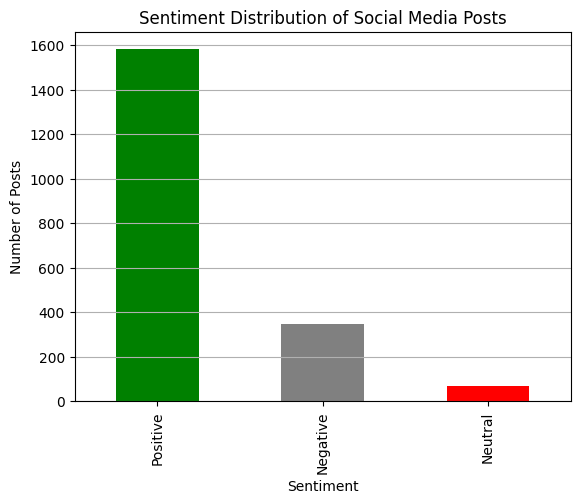

In [ ]:
import matplotlib.pyplot as plt  # helps us draw charts

# Count how many posts fall into each sentiment category
sentiment_counts = df['VADER_Sentiment'].value_counts()

# Create a bar chart
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])

plt.title('Sentiment Distribution of Social Media Posts')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.grid(axis='y')
plt.show()


In [ ]:
# Save the DataFrame to a new CSV file with the cleaned text and sentiment
df.to_csv("cleaned_sentiment_data.csv", index=False)


In [ ]:
from google.colab import files
files.download("cleaned_sentiment_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>